In [3]:
!git clone https://github.com/nytimes/covid-19-data.git

Cloning into 'covid-19-data'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 4363 (delta 15), reused 19 (delta 4), pack-reused 4333
Receiving objects: 100% (4363/4363), 52.96 MiB | 24.81 MiB/s, done.
Resolving deltas: 100% (2541/2541), done.


In [4]:
us_counties = '/content/covid-19-data/us-counties.csv'
us_states = '/content/covid-19-data/us-states.csv'
us_national = '/content/covid-19-data/us.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [89]:
us_counties_df = pd.read_csv(us_counties)
us_counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [7]:
us_states_df = pd.read_csv(us_states)
us_states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [9]:
us_national_df = pd.read_csv(us_national)
us_national_df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [10]:
us_national_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    194 non-null    object
 1   cases   194 non-null    int64 
 2   deaths  194 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [11]:
us_national_df['date']=pd.to_datetime(us_national_df.date)
us_national_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    194 non-null    datetime64[ns]
 1   cases   194 non-null    int64         
 2   deaths  194 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.7 KB


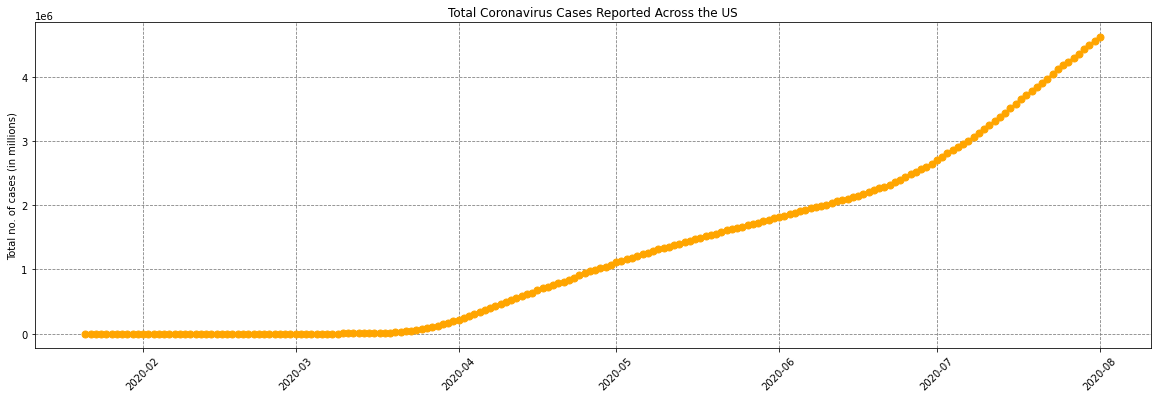

In [12]:
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported Across the US')
plt.plot(us_national_df.date,us_national_df.cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('Total no. of cases (in millions)')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

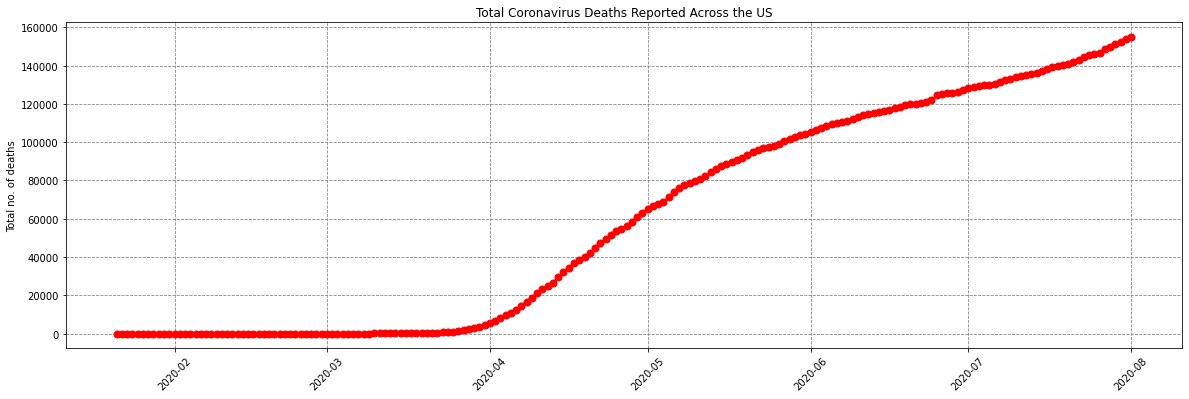

In [13]:
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Deaths Reported Across the US')
plt.plot(us_national_df.date,us_national_df.deaths, c='red', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('Total no. of deaths')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

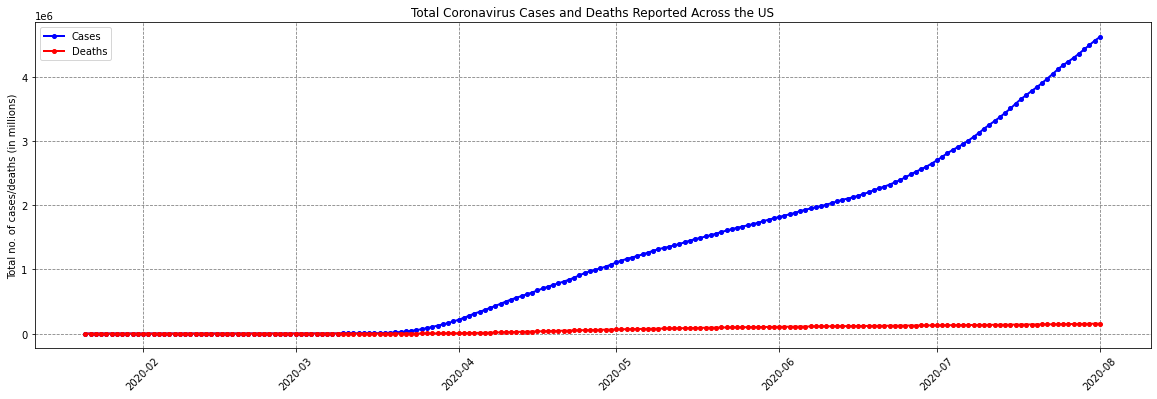

In [14]:
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases and Deaths Reported Across the US')
plt.plot(us_national_df.date,us_national_df.cases, c='blue', linewidth=2, marker='o', markersize=4,label='Cases')
plt.plot(us_national_df.date,us_national_df.deaths, c='red', linewidth=2, marker='o', markersize=4,label='Deaths')
plt.xticks(rotation=45)
plt.ylabel('Total no. of cases/deaths (in millions)')
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

####CASE-FATALITY RATE
**Case fatality rate (CFR)** — sometimes called case fatality risk or case-fatality ratio — is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period

####Plotting CFR for US

In [15]:
us_national_df['CFR']=(us_national_df['deaths']/us_national_df['cases'])*100
us_national_df.head()


,date,cases,deaths,CFR
0,2020-01-21,1,0,0.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,0.0
4,2020-01-25,3,0,0.0


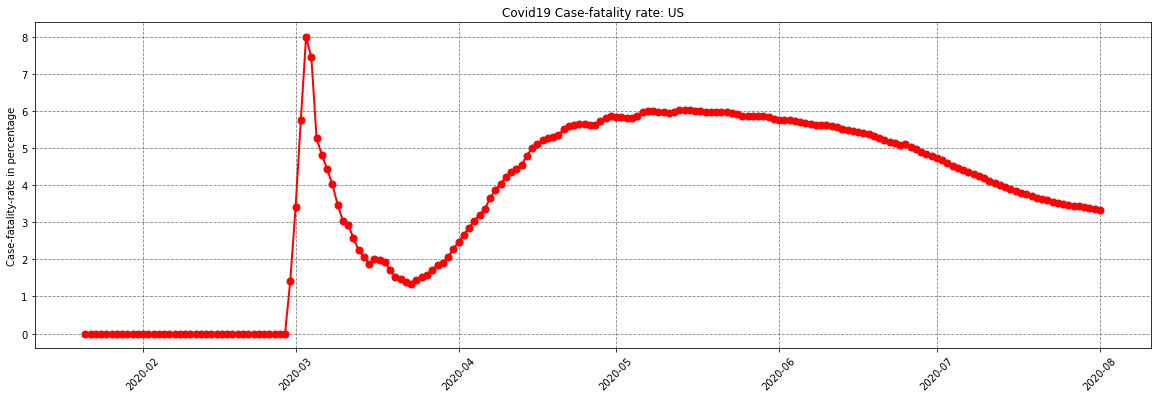

In [16]:

plt.figure(figsize=(20, 6))
plt.title('Covid19 Case-fatality rate: US')
plt.plot(us_national_df.date,us_national_df.CFR, c='red', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('Case-fatality-rate in percentage')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

#### US STATE-LEVEL ANALYSIS

In [17]:
us_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8374 non-null   object
 1   state   8374 non-null   object
 2   fips    8374 non-null   int64 
 3   cases   8374 non-null   int64 
 4   deaths  8374 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 327.2+ KB


In [18]:
us_states_df['date']=pd.to_datetime(us_states_df['date'])
us_states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [19]:
total_states=[elm for elm in us_states_df['state'].unique()]
total_states

['Washington',
 'Illinois',
 'California',
 'Arizona',
 'Massachusetts',
 'Wisconsin',
 'Texas',
 'Nebraska',
 'Utah',
 'Oregon',
 'Florida',
 'New York',
 'Rhode Island',
 'Georgia',
 'New Hampshire',
 'North Carolina',
 'New Jersey',
 'Colorado',
 'Maryland',
 'Nevada',
 'Tennessee',
 'Hawaii',
 'Indiana',
 'Kentucky',
 'Minnesota',
 'Oklahoma',
 'Pennsylvania',
 'South Carolina',
 'District of Columbia',
 'Kansas',
 'Missouri',
 'Vermont',
 'Virginia',
 'Connecticut',
 'Iowa',
 'Louisiana',
 'Ohio',
 'Michigan',
 'South Dakota',
 'Arkansas',
 'Delaware',
 'Mississippi',
 'New Mexico',
 'North Dakota',
 'Wyoming',
 'Alaska',
 'Maine',
 'Alabama',
 'Idaho',
 'Montana',
 'Puerto Rico',
 'Virgin Islands',
 'Guam',
 'West Virginia',
 'Northern Mariana Islands']

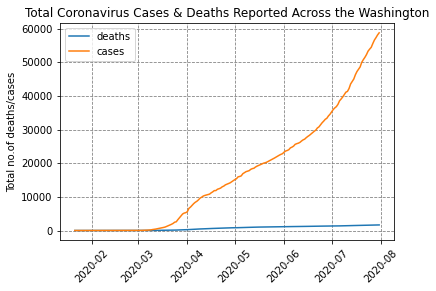

--------------------------------------------------------------------------


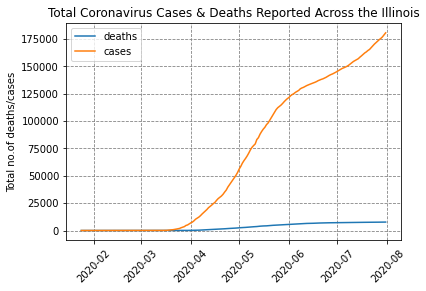

--------------------------------------------------------------------------


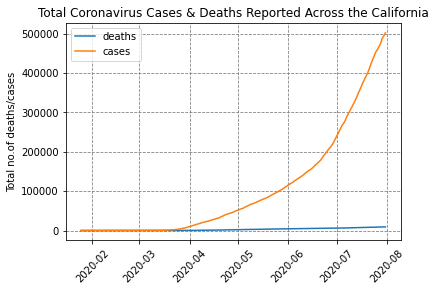

--------------------------------------------------------------------------


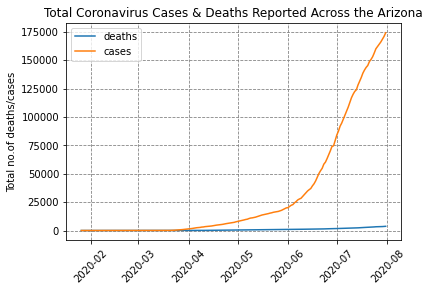

--------------------------------------------------------------------------


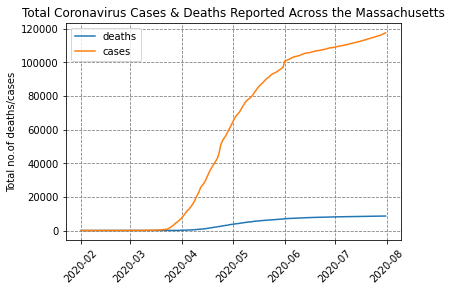

--------------------------------------------------------------------------


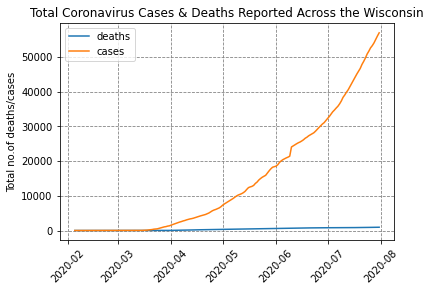

--------------------------------------------------------------------------


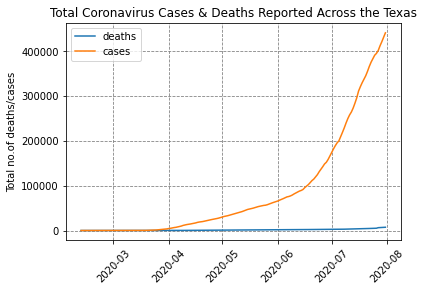

--------------------------------------------------------------------------


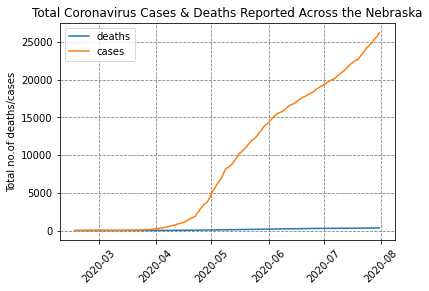

--------------------------------------------------------------------------


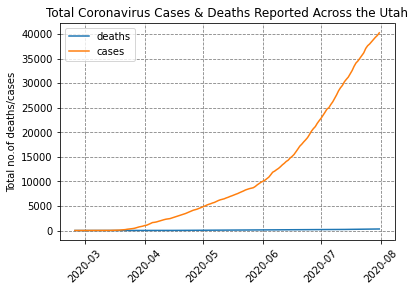

--------------------------------------------------------------------------


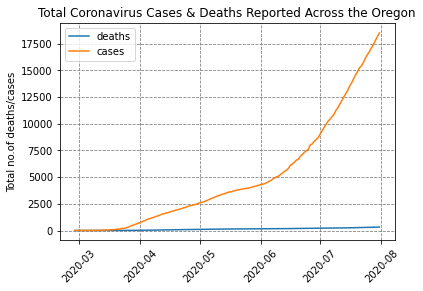

--------------------------------------------------------------------------


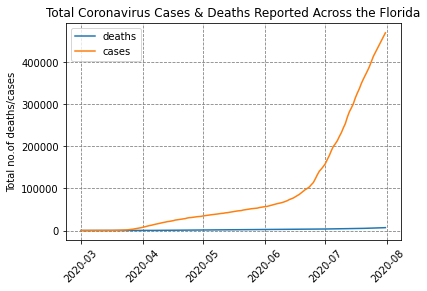

--------------------------------------------------------------------------


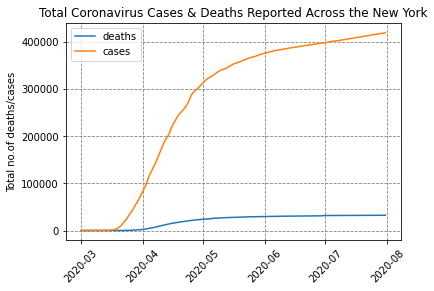

--------------------------------------------------------------------------


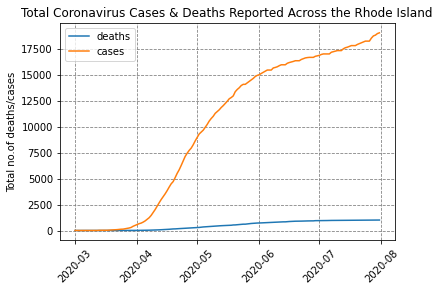

--------------------------------------------------------------------------


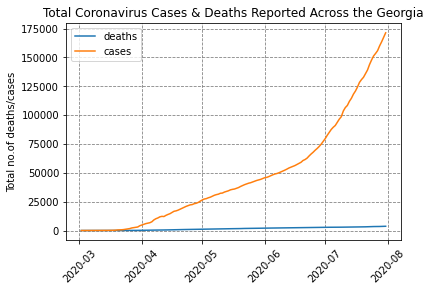

--------------------------------------------------------------------------


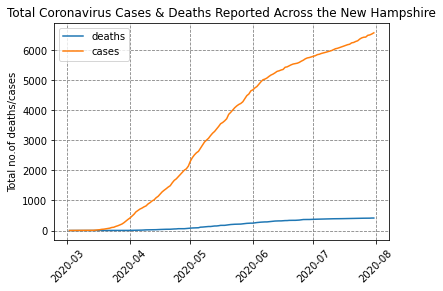

--------------------------------------------------------------------------


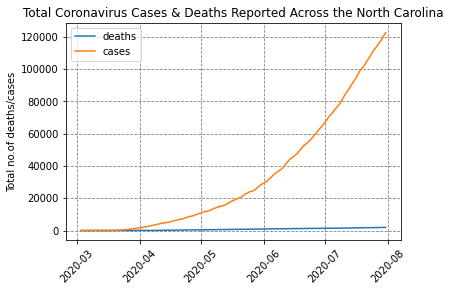

--------------------------------------------------------------------------


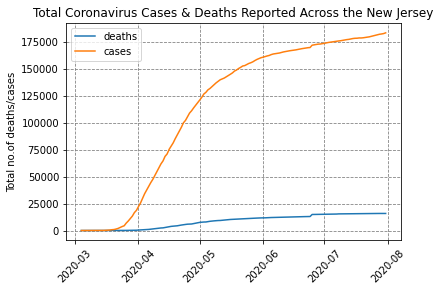

--------------------------------------------------------------------------


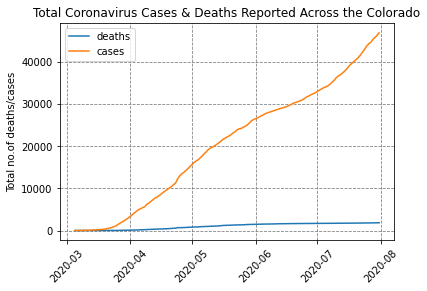

--------------------------------------------------------------------------


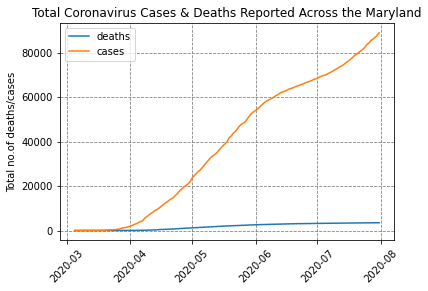

--------------------------------------------------------------------------


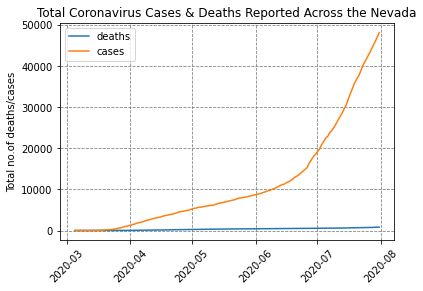

--------------------------------------------------------------------------


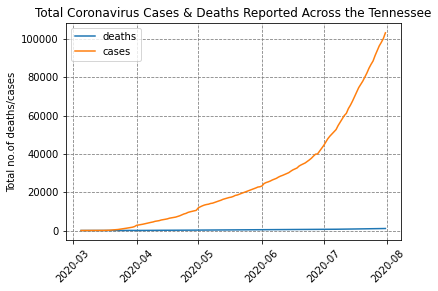

--------------------------------------------------------------------------


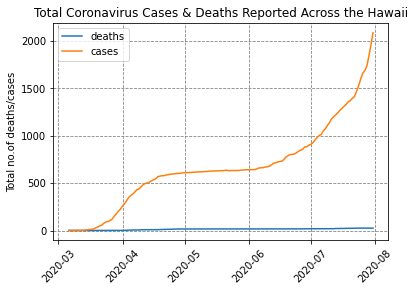

--------------------------------------------------------------------------


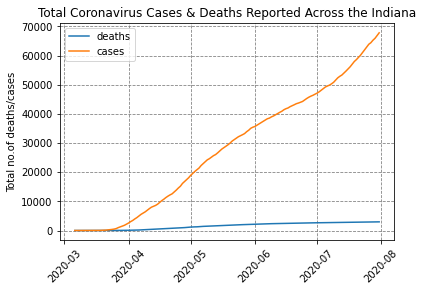

--------------------------------------------------------------------------


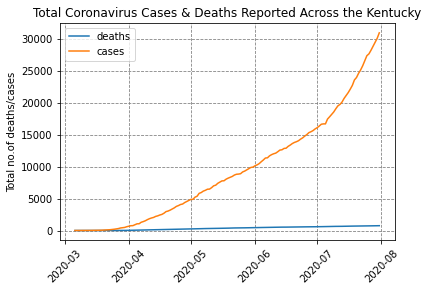

--------------------------------------------------------------------------


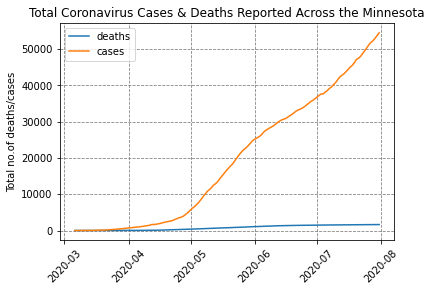

--------------------------------------------------------------------------


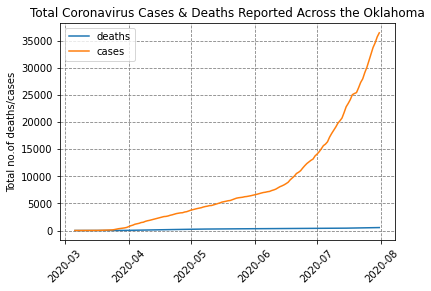

--------------------------------------------------------------------------


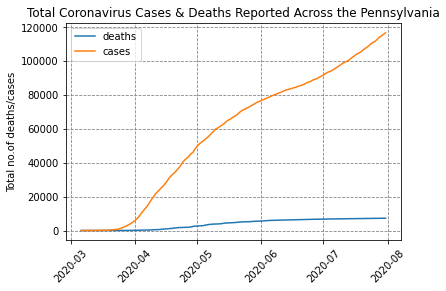

--------------------------------------------------------------------------


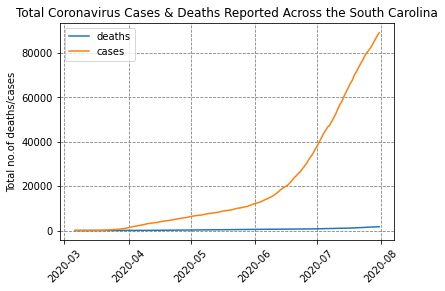

--------------------------------------------------------------------------


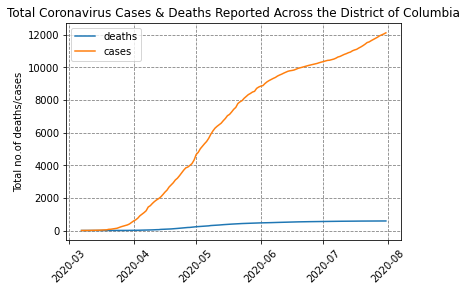

--------------------------------------------------------------------------


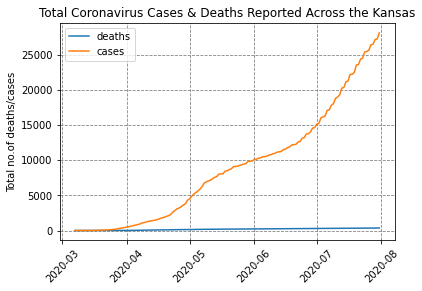

--------------------------------------------------------------------------


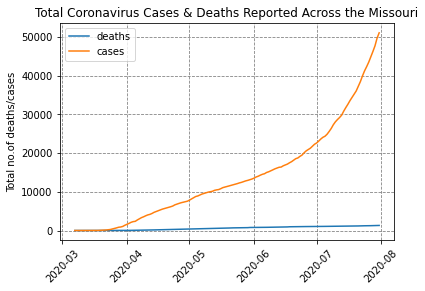

--------------------------------------------------------------------------


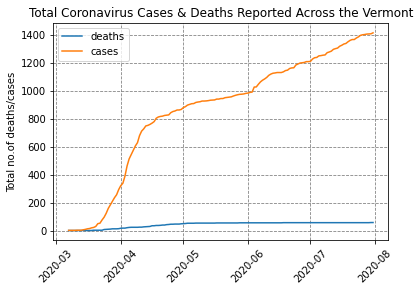

--------------------------------------------------------------------------


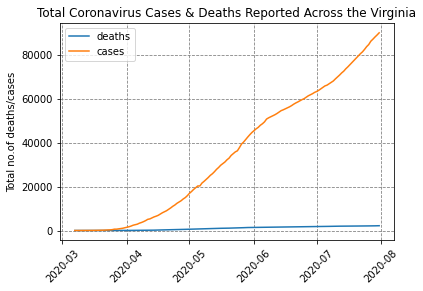

--------------------------------------------------------------------------


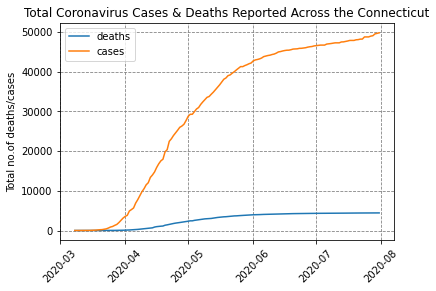

--------------------------------------------------------------------------


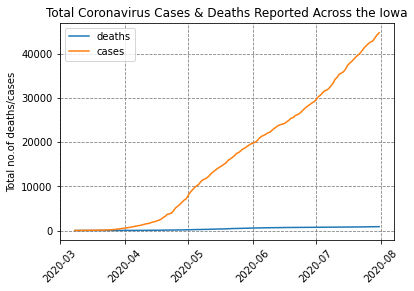

--------------------------------------------------------------------------


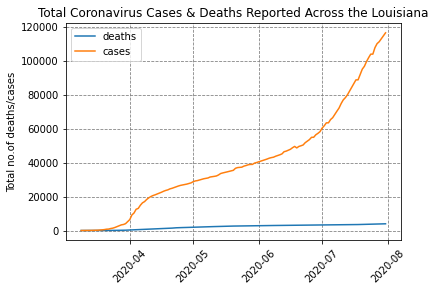

--------------------------------------------------------------------------


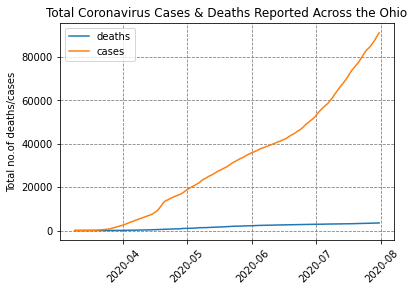

--------------------------------------------------------------------------


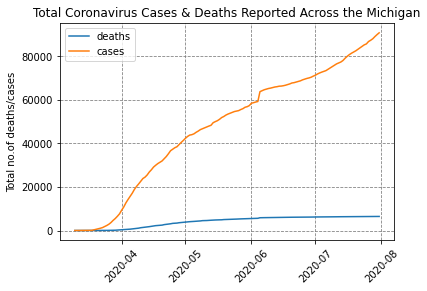

--------------------------------------------------------------------------


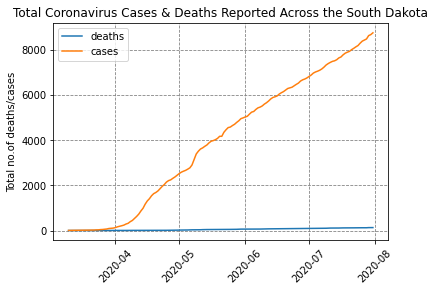

--------------------------------------------------------------------------


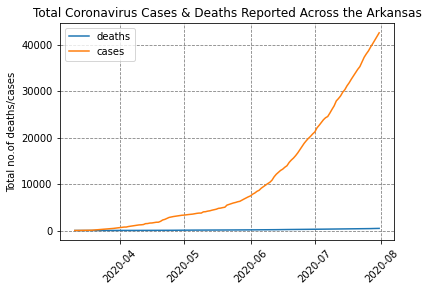

--------------------------------------------------------------------------


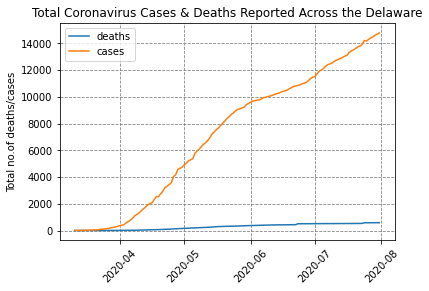

--------------------------------------------------------------------------


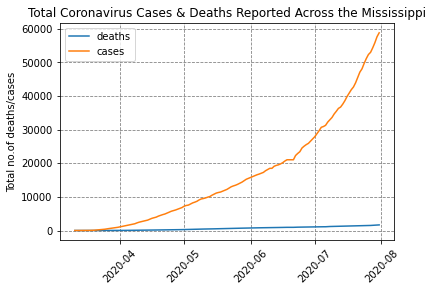

--------------------------------------------------------------------------


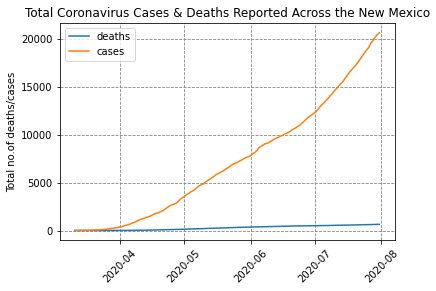

--------------------------------------------------------------------------


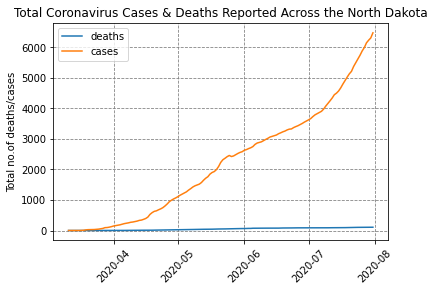

--------------------------------------------------------------------------


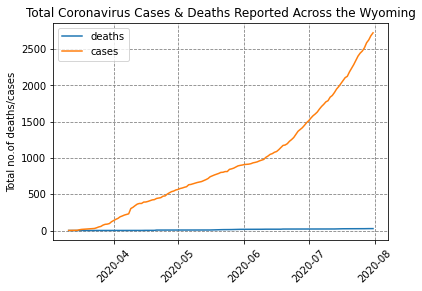

--------------------------------------------------------------------------


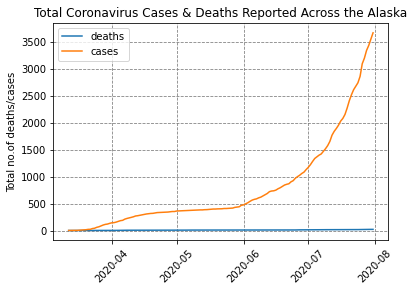

--------------------------------------------------------------------------


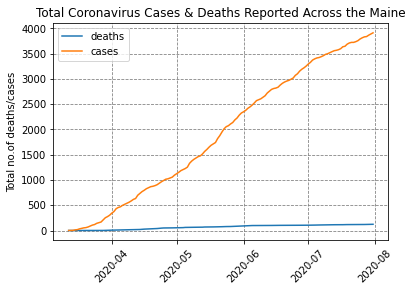

--------------------------------------------------------------------------


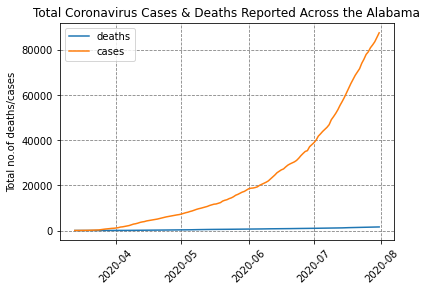

--------------------------------------------------------------------------


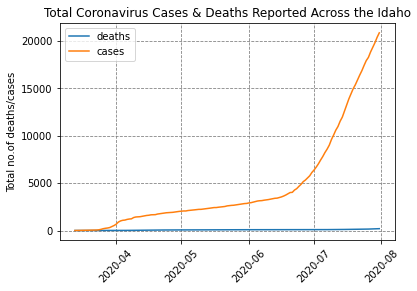

--------------------------------------------------------------------------


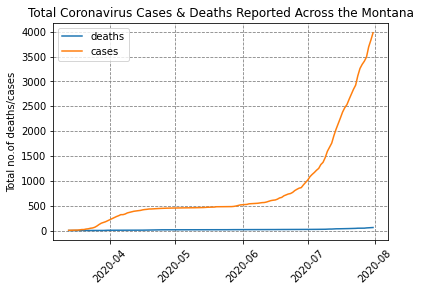

--------------------------------------------------------------------------


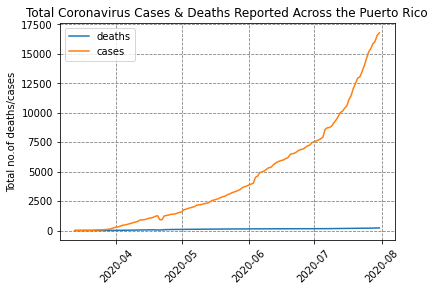

--------------------------------------------------------------------------


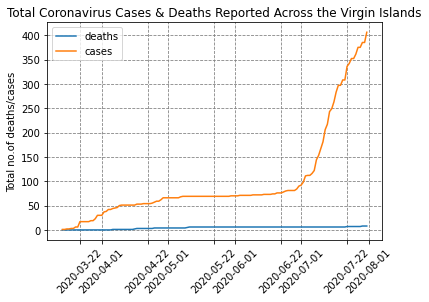

--------------------------------------------------------------------------


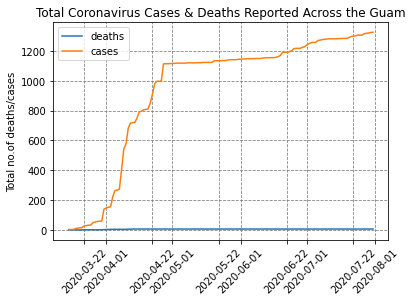

--------------------------------------------------------------------------


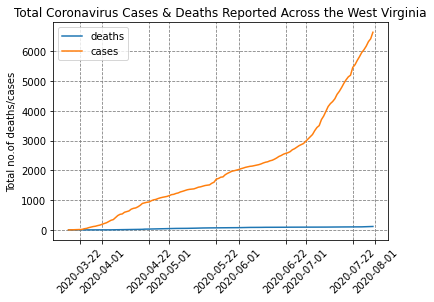

--------------------------------------------------------------------------


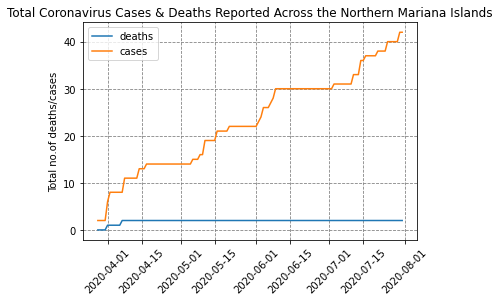

--------------------------------------------------------------------------


In [ ]:

for elm in total_states:
  plt.title('Total Coronavirus Cases & Deaths Reported Across the '+elm)
  
  temp_df=pd.DataFrame(us_states_df[us_states_df['state']==elm])
  plt.plot(temp_df.date, temp_df['deaths'],label='deaths')
  plt.plot(temp_df.date, temp_df['cases'],label='cases')
  plt.xticks(rotation=45)
  plt.ylabel('Total no.of deaths/cases')
  plt.grid(True, 'major', linestyle='--', c='grey')
  plt.legend()
  plt.show()
  print('--------------------------------------------------------------------------')

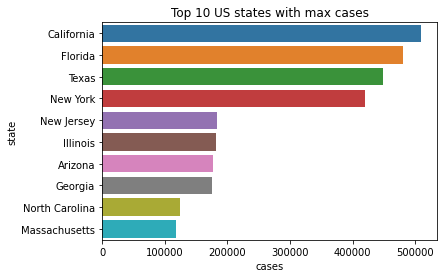

In [65]:
top10states_in_cases=us_states_df[us_states_df['date']==pd.to_datetime('2020-08-01')].sort_values(by='cases',ascending=False).head(10)
sns.barplot(y='state',x='cases',data=top10states_in_cases)
plt.title('Top 10 US states with max cases')
plt.show()

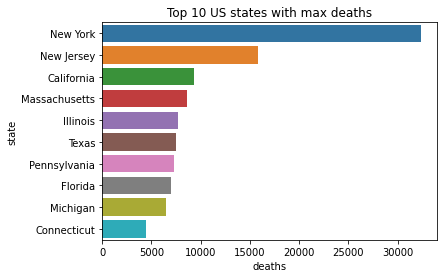

In [66]:
top10states_in_deaths=us_states_df[us_states_df['date']==pd.to_datetime('2020-08-01')].sort_values(by='deaths',ascending=False).head(10)
sns.barplot(y='state',x='deaths',data=top10states_in_deaths)
plt.title('Top 10 US states with max deaths')
plt.show()

In [43]:
us_states_df['CFR']=us_states_df['deaths']/us_states_df['cases']*100
us_states_df.head()

,date,state,fips,cases,deaths,CFR
0,2020-01-21,Washington,53,1,0,0.0
1,2020-01-22,Washington,53,1,0,0.0
2,2020-01-23,Washington,53,1,0,0.0
3,2020-01-24,Illinois,17,1,0,0.0
4,2020-01-24,Washington,53,1,0,0.0


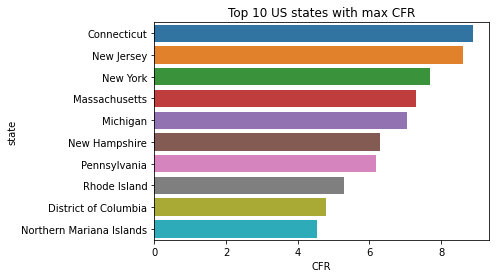

In [68]:
top10states_in_CFR=us_states_df[us_states_df['date']==pd.to_datetime('2020-08-01')].sort_values(by='CFR',ascending=False).head(10)
sns.barplot(y='state',x='CFR',data=top10states_in_CFR)
plt.title('Top 10 US states with max CFR')
plt.show()

####Plotting CFR in different states of US

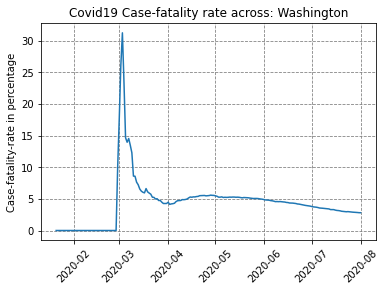

--------------------------------------------------------------------------


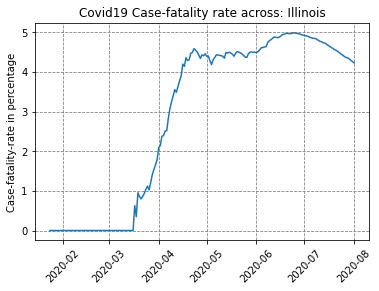

--------------------------------------------------------------------------


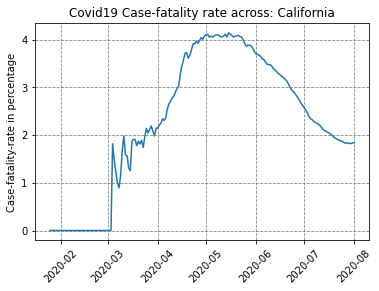

--------------------------------------------------------------------------


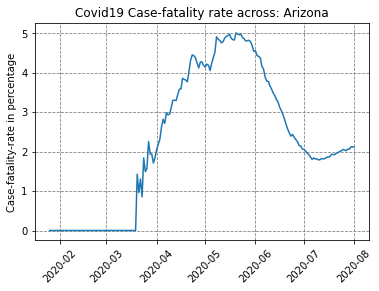

--------------------------------------------------------------------------


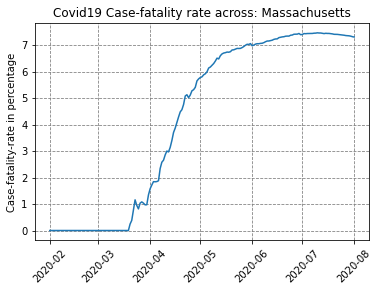

--------------------------------------------------------------------------


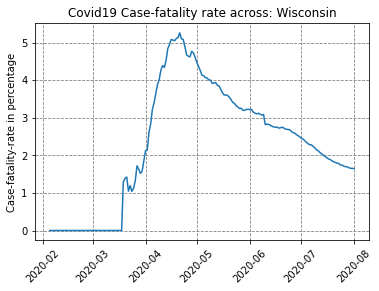

--------------------------------------------------------------------------


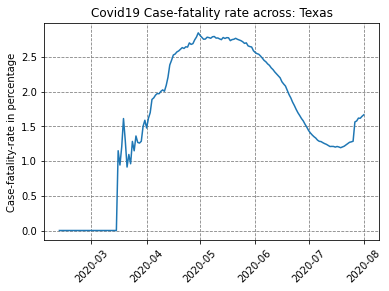

--------------------------------------------------------------------------


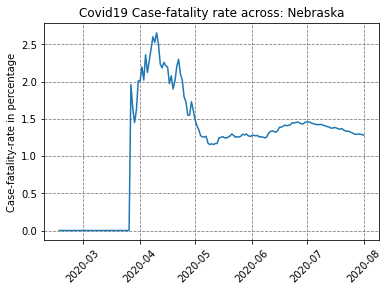

--------------------------------------------------------------------------


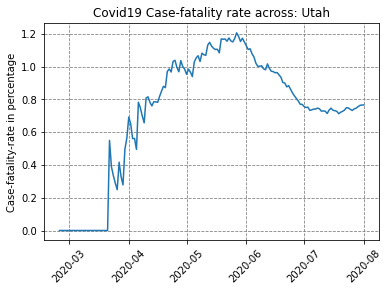

--------------------------------------------------------------------------


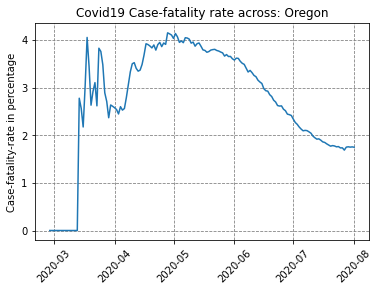

--------------------------------------------------------------------------


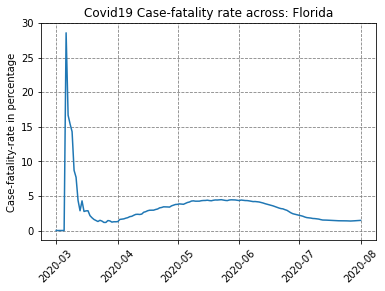

--------------------------------------------------------------------------


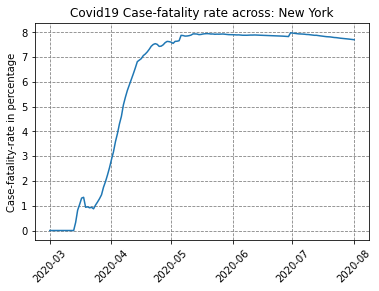

--------------------------------------------------------------------------


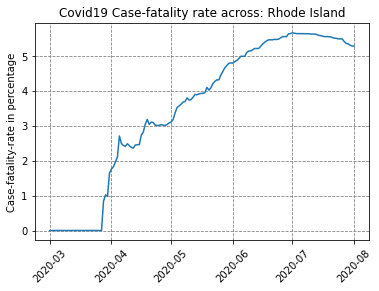

--------------------------------------------------------------------------


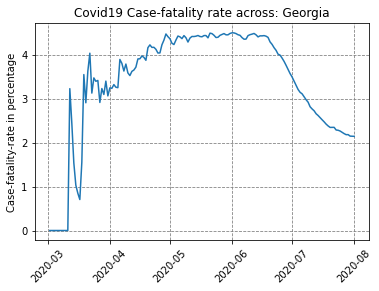

--------------------------------------------------------------------------


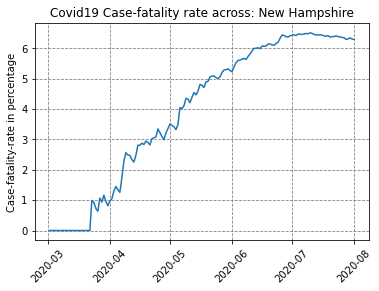

--------------------------------------------------------------------------


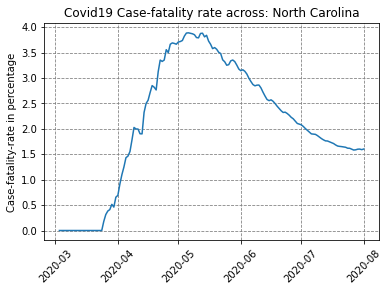

--------------------------------------------------------------------------


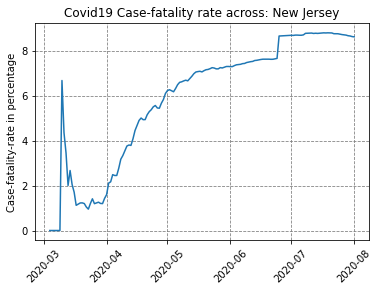

--------------------------------------------------------------------------


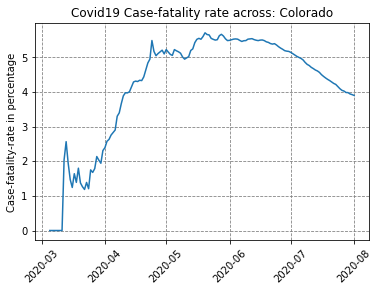

--------------------------------------------------------------------------


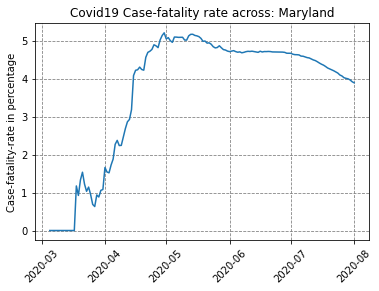

--------------------------------------------------------------------------


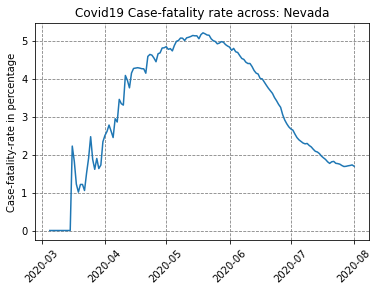

--------------------------------------------------------------------------


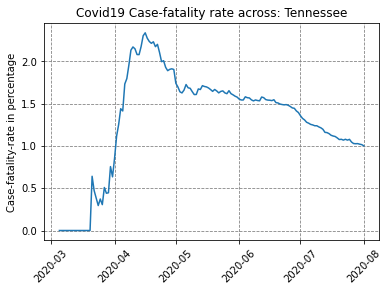

--------------------------------------------------------------------------


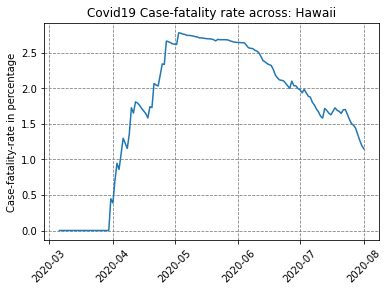

--------------------------------------------------------------------------


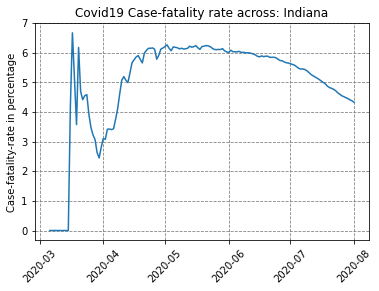

--------------------------------------------------------------------------


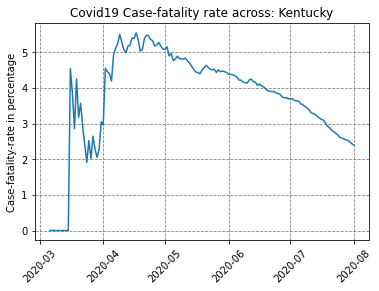

--------------------------------------------------------------------------


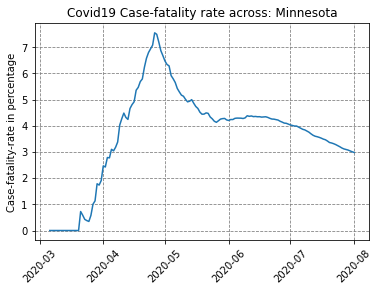

--------------------------------------------------------------------------


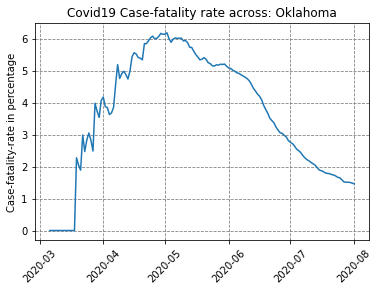

--------------------------------------------------------------------------


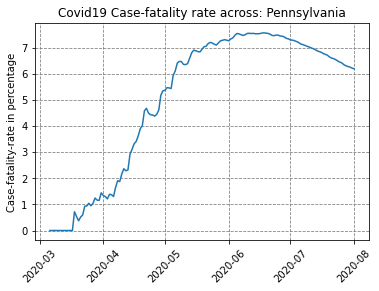

--------------------------------------------------------------------------


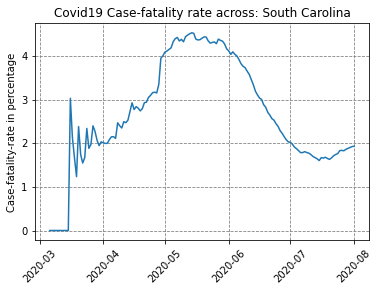

--------------------------------------------------------------------------


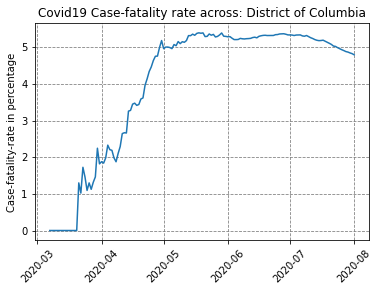

--------------------------------------------------------------------------


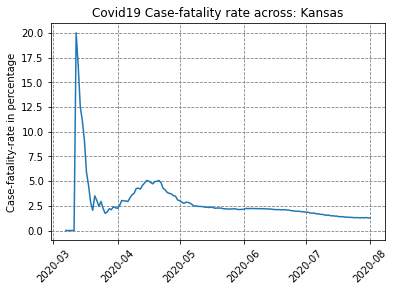

--------------------------------------------------------------------------


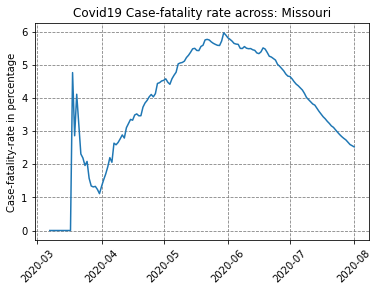

--------------------------------------------------------------------------


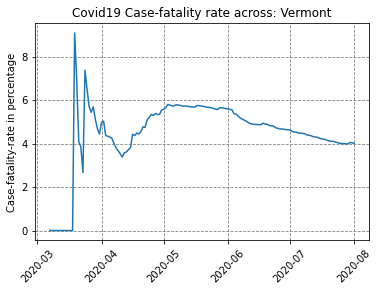

--------------------------------------------------------------------------


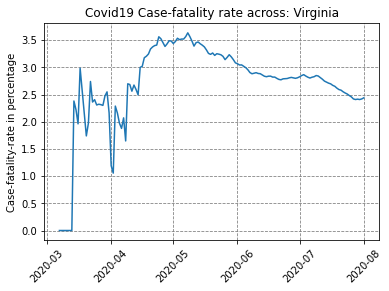

--------------------------------------------------------------------------


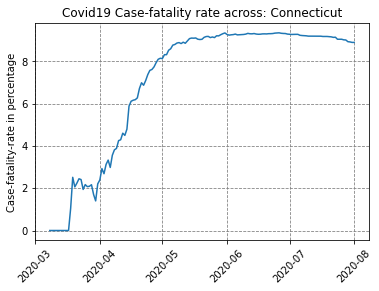

--------------------------------------------------------------------------


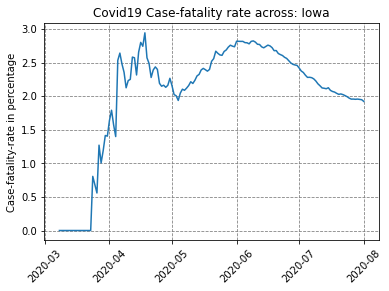

--------------------------------------------------------------------------


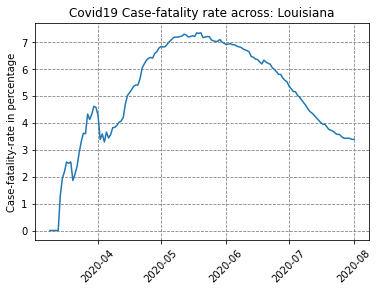

--------------------------------------------------------------------------


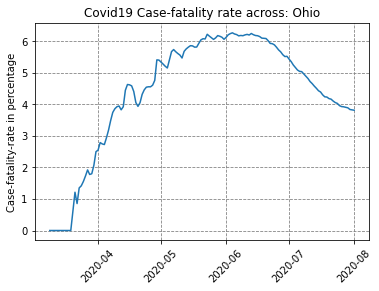

--------------------------------------------------------------------------


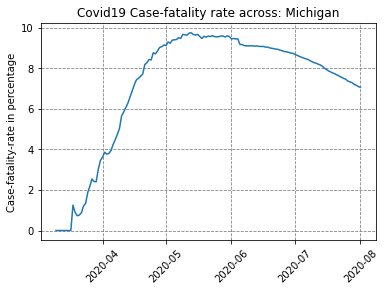

--------------------------------------------------------------------------


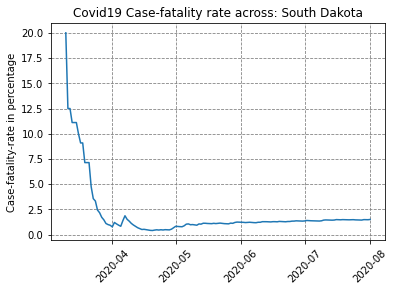

--------------------------------------------------------------------------


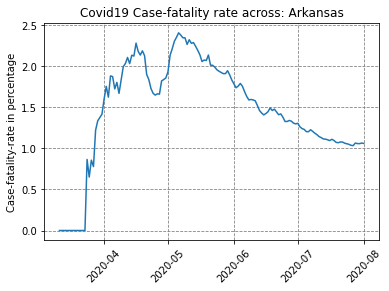

--------------------------------------------------------------------------


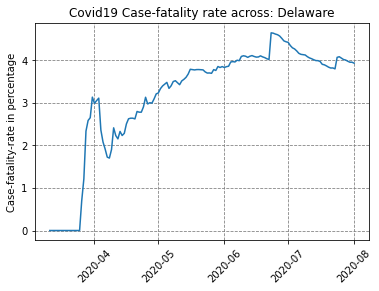

--------------------------------------------------------------------------


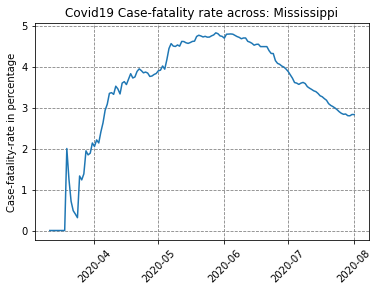

--------------------------------------------------------------------------


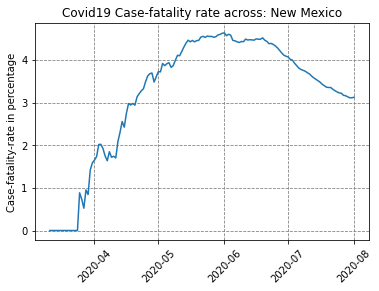

--------------------------------------------------------------------------


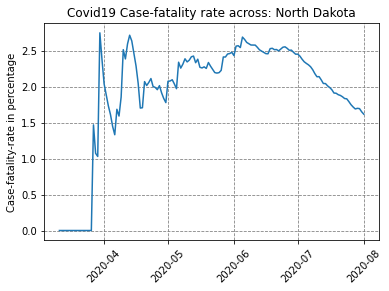

--------------------------------------------------------------------------


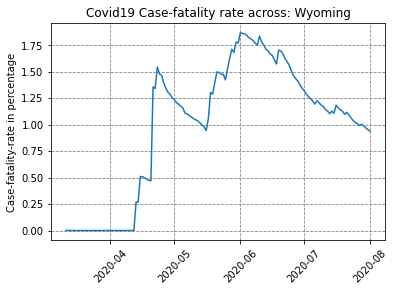

--------------------------------------------------------------------------


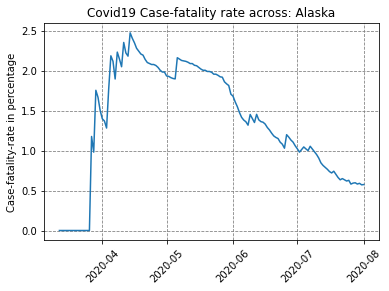

--------------------------------------------------------------------------


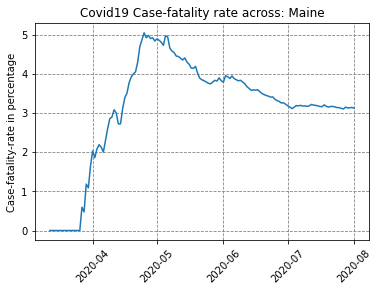

--------------------------------------------------------------------------


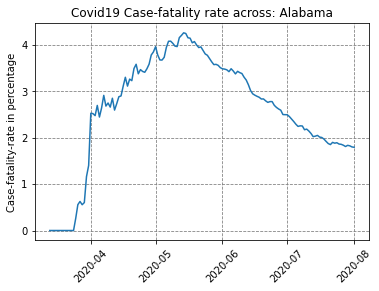

--------------------------------------------------------------------------


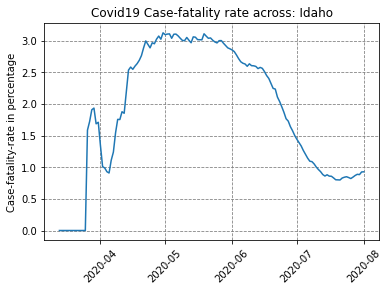

--------------------------------------------------------------------------


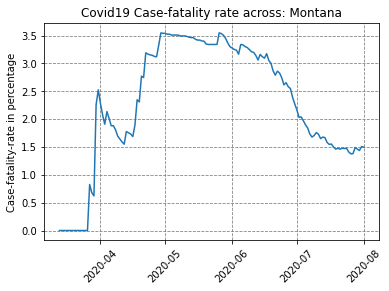

--------------------------------------------------------------------------


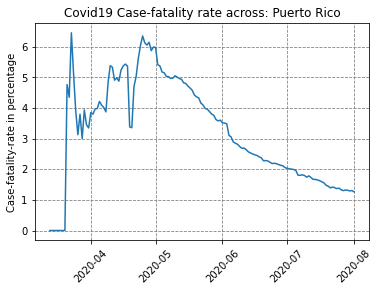

--------------------------------------------------------------------------


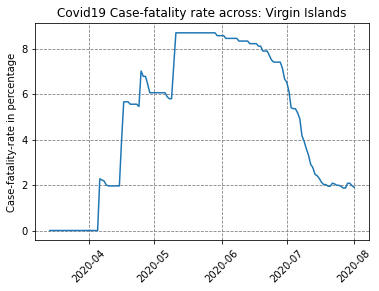

--------------------------------------------------------------------------


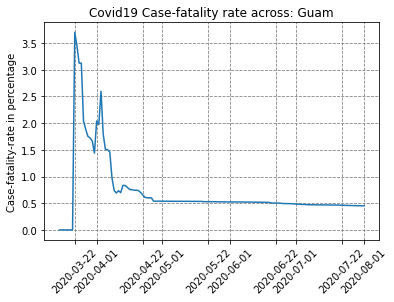

--------------------------------------------------------------------------


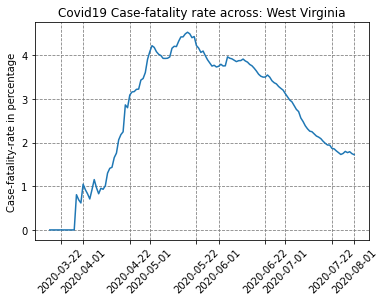

--------------------------------------------------------------------------


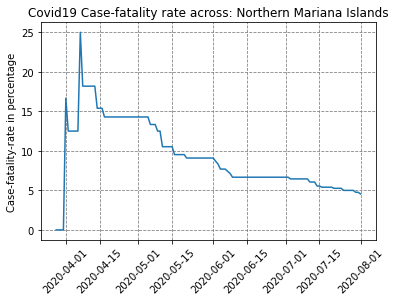

--------------------------------------------------------------------------


In [45]:
for elm in total_states:
  plt.title('Covid19 Case-fatality rate across: '+elm)
  
  temp_df=pd.DataFrame(us_states_df[us_states_df['state']==elm])
  plt.plot(temp_df.date,temp_df['CFR'])
  plt.xticks(rotation=45)
  plt.ylabel('Case-fatality-rate in percentage')
  plt.grid(True, 'major', linestyle='--', c='grey')
  plt.show()
  print('--------------------------------------------------------------------------')

####Plotting Covid Cases,Deaths and CFR for different counties in US
Since there can be counties with same name
in two or more states, so i used fips to differentiate and plot the graph.For example, 'Albany' is present in two different states:'Wyoming' and 'New York'. 

In [90]:
us_counties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392419 entries, 0 to 392418
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    392419 non-null  object 
 1   county  392419 non-null  object 
 2   state   392419 non-null  object 
 3   fips    388484 non-null  float64
 4   cases   392419 non-null  int64  
 5   deaths  392419 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 18.0+ MB


In [91]:
us_counties_df.dropna(axis=0,inplace=True)
us_counties_df['date']=pd.to_datetime(us_counties_df['date'])

us_counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388484 entries, 0 to 392418
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    388484 non-null  datetime64[ns]
 1   county  388484 non-null  object        
 2   state   388484 non-null  object        
 3   fips    388484 non-null  float64       
 4   cases   388484 non-null  int64         
 5   deaths  388484 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 20.7+ MB


In [48]:
from collections import defaultdict

In [49]:
total_fips=[el for el in us_counties_df['fips'].unique()]
fips_dictionary=defaultdict(list)
len(total_fips)

3189

In [50]:
for elm in total_fips:
  x=us_counties_df[us_counties_df['fips']==elm]
  fips_dictionary[elm].append(x.county.unique().item()+','+x.state.unique().item())
fips_dictionary

defaultdict(list,
            {53061.0: ['Snohomish,Washington'],
             17031.0: ['Cook,Illinois'],
             6059.0: ['Orange,California'],
             4013.0: ['Maricopa,Arizona'],
             6037.0: ['Los Angeles,California'],
             6085.0: ['Santa Clara,California'],
             25025.0: ['Suffolk,Massachusetts'],
             6075.0: ['San Francisco,California'],
             55025.0: ['Dane,Wisconsin'],
             6073.0: ['San Diego,California'],
             48029.0: ['Bexar,Texas'],
             31055.0: ['Douglas,Nebraska'],
             6023.0: ['Humboldt,California'],
             6067.0: ['Sacramento,California'],
             6095.0: ['Solano,California'],
             53063.0: ['Spokane,Washington'],
             49035.0: ['Salt Lake,Utah'],
             6041.0: ['Marin,California'],
             6055.0: ['Napa,California'],
             6097.0: ['Sonoma,California'],
             41067.0: ['Washington,Oregon'],
             53033.0: ['King,Washing

In [ ]:
for elm in total_fips:
  plt.title('Total Coronavirus Cases & Deaths Reported Across: '+fips_dictionary[elm][0]+' (fip-'+str(elm)+')')
  temp_df=pd.DataFrame(us_counties_df[us_counties_df['fips']==elm])
  plt.plot(temp_df.date, temp_df['deaths'],label='deaths')
  plt.plot(temp_df.date, temp_df['cases'],label='cases')
  plt.xticks(rotation=45)
  plt.ylabel('Total no.of deaths or cases')
  plt.grid(True, 'major', linestyle='--', c='grey')
  plt.legend()
  plt.show()
  print('--------------------------------------------------------------------------')
  
  

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for elm in total_fips:
  
  plt.title('Covid19 Case-fatality rate across: '+fips_dictionary[elm][0]+' (fip-'+str(elm)+')')
  
  temp_df=pd.DataFrame(us_counties_df[us_counties_df['fips']==elm])
  plt.plot(temp_df.date,100*(temp_df['deaths']/temp_df['cases']))
  plt.xticks(rotation=45)
  plt.ylabel('Case-fatality-rate in percentage')
  plt.grid(True, 'major', linestyle='--', c='grey')
  plt.show()
  print('--------------------------------------------------------------------------')
  
  

Output hidden; open in https://colab.research.google.com to view.